In [1]:
from google.colab import files
!pip install kaggle
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 65 bytes


In [2]:
! kaggle datasets download -d muhammetvarl/laptop-price

  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 24.2MB/s]


In [3]:
#extracte data from zipfile
import zipfile
zf = "/content/laptop-price.zip"
target_dir = "/content/dataset/laptop"
zfile = zipfile.ZipFile(zf)
zfile.extractall(target_dir)

In [4]:
!pip install datasist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 308 kB 5.2 MB/s 
     |████████████████████████████████| 81 kB 9.3 MB/s 
     |████████████████████████████████| 210 kB 80.7 MB/s 
     |████████████████████████████████| 78 kB 7.6 MB/s 
     |████████████████████████████████| 49 kB 6.9 MB/s 
     |████████████████████████████████| 146 kB 74.9 MB/s 
     |████████████████████████████████| 112 kB 69.2 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=ffc98f4507fb77af45bd87250fd677bb1f510cb90af8c988180c208ba8ef7072
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


# Bussiness Task
**I hope you find this NoteBook helpful and some <span style="color:red;">UPVOTES</span> would be appreciated.**



# Import libraries.


In [176]:
# Core
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
# from matplotlib.pyplot.bar_label
import seaborn as sns; sns.set()
import glob
import random
import os
import pickle
from  datasist.structdata import detect_outliers
from tqdm import tqdm
# Core
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set(rc={'figure.figsize':[7,7]},font_scale=1.2)

import sklearn
import xlrd
import optuna
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# Pre Processing
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Regressors
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
# Error Metrics 
from sklearn.metrics import r2_score #r2 square
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_confusion_matrix ,classification_report
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score


#classefication
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier #stacstic gradient descent clasifeier
import graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#crossvalidation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
#clustring 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
#hyper parameter tunning
from sklearn.model_selection import GridSearchCV
#pca
from sklearn.decomposition import PCA

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
seed = 42
np.random.seed =seed

# Bussiness Task
Laptop Company Price List for Regression.

# Business Goal
Nedd to  analize and  and predict Laptop price.



# About Data

1.   Company- String -Laptop Manufacturer
2.   Product -String -Brand and Model
1.    TypeName -String -Type (Notebook, Ultrabook, Gaming, etc.)
2.   Inches -Numeric- Screen Size
1.   ScreenResolution -String- Screen Resolution
2.   Cpu- String -Central Processing Unit (CPU)
1.   Ram -String- Laptop RAM
2.   Memory -String- Hard Disk / SSD Memory
1.   GPU -String- Graphics Processing Units (GPU)
2.   OpSys -String- Operating System
1.   Weight -String- Laptop Weight
2.   Price_euros -Numeric- Price (Euro)

# Helper Function ⚒





In [10]:
#convert data frame to slower case
def lowerCase(x):
    return x.lower()

#check duplicate data 
def check_duplicate(df):
    if df.duplicated().all():
        return  'There are duplicate Data in Data Frame Nedded To be  removed ' 
    else :
        return 'Data Is clean ,No Duplicate Data Found '
# # extract data from  ScreenResolution cloumn            
# def screenColumn(x):
#     ressolution = x.split(' ')[-1]
#     y = x.split(' ')[:-1]
#     if 'touchscreen' in y :
#         touch = float(1) 
#     else:
#         touch = float (0) 
#     return ressolution, touch
# get freq 
def getfreq(x):
    freq = x.split(' ')[-1]
    return freq

def numerical_plotting(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.distplot(df[col],kde=True)
    plt.xticks(rotation=45)
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()   

def categorical_plotting(df,col,title):
    fig, ax = plt.subplots(figsize=(10,5))
    ax=sns.countplot(x=col, data=df, palette='flare', order = df[col].value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.bar_label(ax.containers[0])
    plt.title(title)
    plt.show()

def plot_feature_importance (x,model,Model_name):
    columns_list = x.columns
    model.feature_names = columns_list
    plt.barh(model.feature_names,model.coef_)
    plt.xticks(rotation=45);
    plt.title('Feature Importance'+ Model_name)
    plt.xlabel('Feature Importance (%)')
    plt.show()

def plot_feature_importance_2 (x,model,Model_name):
    columns_list = x.columns
    model.feature_names = columns_list
    plt.barh(model.feature_names,model.feature_importances_)
    plt.xticks(rotation=45);
    plt.title('Feature Importance'+ Model_name)
    plt.xlabel('Feature Importance (%)')
    plt.show()


 

# Reading Data

In [11]:
df = pd.read_csv('/content/dataset/laptop/laptop_price.csv',encoding='ISO-8859-1')
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [12]:
df['Company']= df['Company'].apply(lowerCase) 
df['Product']= df['Product'].apply(lowerCase) 
df['ScreenResolution']= df['ScreenResolution'].apply(lowerCase) 
df['Cpu']= df['Cpu'].apply(lowerCase) 

# Data Cleaning
*   check column type.
*   drop un necessary column.
*   check duplicate data 
*   check  missing value.
*   dealing with missing value



In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [14]:
df.shape

(1303, 13)

In [15]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


 **Notes to be considered** 📔☝ 

From above we Found below that we have 2 column with numerical value .

*   Maximum value for Inches is 18.4 and Min is 10.10
*   Maximum value for Price_euros is 6099. and Min is 174  

 * i will investigate the distribution for this table  to be shure that data is normal distrbuted or not






In [16]:
#drop un nessesary columns
df = df.drop(['laptop_ID'],axis=1)

* **i dropped this column  because  when i make model for  data , i want model to not give it any weight to neglect its imprtance**

In [17]:
#check duplicate data 
check_duplicate(df)

'Data Is clean ,No Duplicate Data Found '

In [18]:
# check missing Value
df.isnull().sum().sort_values(ascending=False)

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

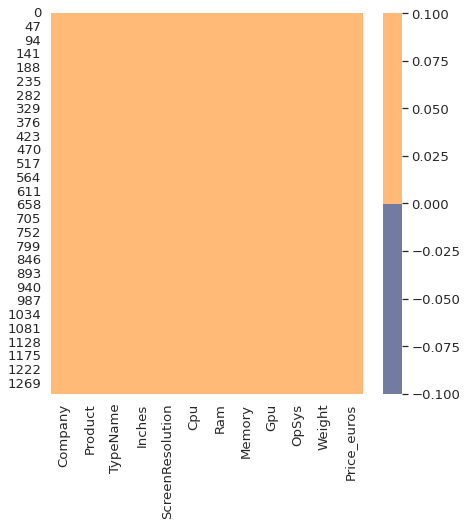

In [19]:
cols =df.columns
colours = ['#747BA1', '#FFBA77'] # specify the orange  - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

# columns Enhancment 
*   Check data inside each coulmn and try to fix it if needed .

In [20]:
df.head(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,apple,macbook pro,Ultrabook,13.3,ips panel retina display 2560x1600,intel core i5 2.3ghz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,apple,macbook air,Ultrabook,13.3,1440x900,intel core i5 1.8ghz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,hp,250 g6,Notebook,15.6,full hd 1920x1080,intel core i5 7200u 2.5ghz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,apple,macbook pro,Ultrabook,15.4,ips panel retina display 2880x1800,intel core i7 2.7ghz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,apple,macbook pro,Ultrabook,13.3,ips panel retina display 2560x1600,intel core i5 3.1ghz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


<font size="4" >**Screen Resolution** </font> 


*   i will divide this column to 3 columns (resolution, type,touch screen)
*   drop coulmn ScreenResolution




In [21]:
#ScreenResolution column 
df['ScreenResolution']
# we can extract 3 column from this column  as screen type ,screen resoluntion ,touch screen 

0               ips panel retina display 2560x1600
1                                         1440x900
2                                full hd 1920x1080
3               ips panel retina display 2880x1800
4               ips panel retina display 2560x1600
                           ...                    
1298     ips panel full hd / touchscreen 1920x1080
1299    ips panel quad hd+ / touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: ScreenResolution, Length: 1303, dtype: object

In [22]:
# get screen resolution we wiil extraxt only latest num x num  as below
df['resolution'] =df['ScreenResolution'].str.extract(r'(\d+x\d+)')

In [23]:
#get all screen type ,we will remove  latest 3  resolution deigits
df['screentype'] = df['ScreenResolution'].replace(r'(\d+x\d+)','',regex=True)

In [24]:
df['screentype'] = df['screentype'].replace(r'(full hd|quad hd|quad hd|\+|/|4k ultra hd)','',regex=True)
df['screentype']

0       ips panel retina display 
1                                
2                                
3       ips panel retina display 
4       ips panel retina display 
                  ...            
1298     ips panel   touchscreen 
1299     ips panel   touchscreen 
1300                             
1301                             
1302                             
Name: screentype, Length: 1303, dtype: object

In [25]:
# get touch screen column 
df['touchscreen'] = df['screentype'].str.extract(r'(touchscreen)')
df['touchscreen']

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
1298    touchscreen
1299    touchscreen
1300            NaN
1301            NaN
1302            NaN
Name: touchscreen, Length: 1303, dtype: object

In [26]:
#remove touch screen word from column 
df['screentype'] = df['screentype'].replace(r'touchscreen','',regex=True)
df['screentype']

0       ips panel retina display 
1                                
2                                
3       ips panel retina display 
4       ips panel retina display 
                  ...            
1298                ips panel    
1299                ips panel    
1300                             
1301                             
1302                             
Name: screentype, Length: 1303, dtype: object

In [27]:
#replace all null data with 1 and filled data with 1
df['touchscreen'] = df['touchscreen'].replace('touchscreen',1)
df['touchscreen'] = df['touchscreen'].replace(np.nan,0)
df['touchscreen']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1298    1.0
1299    1.0
1300    0.0
1301    0.0
1302    0.0
Name: touchscreen, Length: 1303, dtype: float64

In [28]:
df['screentype'].value_counts()

                             549
                             314
ips panel                    265
                              75
ips panel                     72
ips panel retina display      17
ips panel                     11
Name: screentype, dtype: int64

In [29]:
#remove spaces
df['screentype']= df['screentype'].replace(r' ','',regex=True)

In [30]:
df['screentype'].value_counts()

                         938
ipspanel                 348
ipspanelretinadisplay     17
Name: screentype, dtype: int64

In [31]:
#repcae special characters  null data with nan
df['screentype'] = df['screentype'].replace(r'^\s*$', np.nan, regex=True)
df['screentype'].value_counts()

ipspanel                 348
ipspanelretinadisplay     17
Name: screentype, dtype: int64

In [32]:
df['screentype']

0       ipspanelretinadisplay
1                         NaN
2                         NaN
3       ipspanelretinadisplay
4       ipspanelretinadisplay
                ...          
1298                 ipspanel
1299                 ipspanel
1300                      NaN
1301                      NaN
1302                      NaN
Name: screentype, Length: 1303, dtype: object

In [33]:
df = df.drop('ScreenResolution', axis=1)

<font size="4" >**CPU** </font> 


*   i will divide this column to 2 columns (CPU , CPU Frequancy)
* conver type of new column to float




In [34]:
# repeate steps for CPU column to extarct 2Coumn
df['Cpu']

0                       intel core i5 2.3ghz
1                       intel core i5 1.8ghz
2                 intel core i5 7200u 2.5ghz
3                       intel core i7 2.7ghz
4                       intel core i5 3.1ghz
                        ...                 
1298              intel core i7 6500u 2.5ghz
1299              intel core i7 6500u 2.5ghz
1300    intel celeron dual core n3050 1.6ghz
1301              intel core i7 6500u 2.5ghz
1302    intel celeron dual core n3050 1.6ghz
Name: Cpu, Length: 1303, dtype: object

In [35]:
df['freq'] = df['Cpu'].apply(getfreq).replace(r'ghz','',regex=True)
df['freq'] 

0       2.3
1       1.8
2       2.5
3       2.7
4       3.1
       ... 
1298    2.5
1299    2.5
1300    1.6
1301    2.5
1302    1.6
Name: freq, Length: 1303, dtype: object

In [36]:
result=[]
for value in df['Cpu'] :
    x = value.split(' ')[:-1]
    y =' '.join(x)
    result.append(y)
df['cpu_'] = result


In [37]:
 df = df.drop(['Cpu'],axis=1)

In [38]:
#convert data type from string to float
df['freq']= df['freq'].astype(float)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   Product      1303 non-null   object 
 2   TypeName     1303 non-null   object 
 3   Inches       1303 non-null   float64
 4   Ram          1303 non-null   object 
 5   Memory       1303 non-null   object 
 6   Gpu          1303 non-null   object 
 7   OpSys        1303 non-null   object 
 8   Weight       1303 non-null   object 
 9   Price_euros  1303 non-null   float64
 10  resolution   1303 non-null   object 
 11  screentype   365 non-null    object 
 12  touchscreen  1303 non-null   float64
 13  freq         1303 non-null   float64
 14  cpu_         1303 non-null   object 
dtypes: float64(4), object(11)
memory usage: 152.8+ KB


<font size="4"  >**RAM** </font> 


*  i will convert  this column to be  an integer value instead of categorical vallue by conver tit ti float and remve GB from column .





In [40]:
#remove GM as all unique value contain GB at end of value loke 5Gb.
#comvert it to inerger
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)

<font size="4"  >**Weight** </font> 


*  remove kg from column and conver it to float





In [41]:
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)
df['Weight'] 

0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1298    1.80
1299    1.30
1300    1.50
1301    2.19
1302    2.20
Name: Weight, Length: 1303, dtype: float64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   Product      1303 non-null   object 
 2   TypeName     1303 non-null   object 
 3   Inches       1303 non-null   float64
 4   Ram          1303 non-null   int64  
 5   Memory       1303 non-null   object 
 6   Gpu          1303 non-null   object 
 7   OpSys        1303 non-null   object 
 8   Weight       1303 non-null   float64
 9   Price_euros  1303 non-null   float64
 10  resolution   1303 non-null   object 
 11  screentype   365 non-null    object 
 12  touchscreen  1303 non-null   float64
 13  freq         1303 non-null   float64
 14  cpu_         1303 non-null   object 
dtypes: float64(5), int64(1), object(9)
memory usage: 152.8+ KB


<font size="4" >**Memory** </font> 


*  sepate column 4 columns with storage1,storage2,value1,value2
*  convert it to float 

In [43]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [44]:
df['main_storage']=df['Memory']

In [45]:
df['main_storage']=df['main_storage'].str.replace('1.0TB','1TB', regex=True)
df['main_storage']=df['main_storage'].str.replace('1TB','1000GB')
df['main_storage']=df['main_storage'].str.replace('2TB','2000GB')
df['main_storage']=df['main_storage'].str.replace('GB','')
df['main_storage'].value_counts()

256 SSD                         412
1000 HDD                        224
500 HDD                         132
512 SSD                         118
128 SSD +  1000 HDD              94
128 SSD                          76
256 SSD +  1000 HDD              73
32 Flash Storage                 38
2000 HDD                         16
64 Flash Storage                 15
512 SSD +  1000 HDD              14
1000 SSD                         14
256 SSD +  2000 HDD              10
1000 Hybrid                       9
256 Flash Storage                 8
16 Flash Storage                  7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
512 Flash Storage                 2
1000 SSD +  1000 HDD              2
256 SSD +  500 HDD                2
128 SSD +  2000 HDD               2
256 SSD +  256 SSD                2
512 SSD +  256 SSD                1
512 SSD +  512 SSD          

In [46]:
df['main_storage']=df['main_storage'].str.replace(r' ','')
df['main_storage'].value_counts()

256SSD                    412
1000HDD                   224
500HDD                    132
512SSD                    118
128SSD+1000HDD             94
128SSD                     76
256SSD+1000HDD             73
32FlashStorage             38
2000HDD                    16
64FlashStorage             15
512SSD+1000HDD             14
1000SSD                    14
256SSD+2000HDD             10
1000Hybrid                  9
256FlashStorage             8
16FlashStorage              7
32SSD                       6
180SSD                      5
128FlashStorage             4
512SSD+2000HDD              3
16SSD                       3
512FlashStorage             2
1000SSD+1000HDD             2
256SSD+500HDD               2
128SSD+2000HDD              2
256SSD+256SSD               2
512SSD+256SSD               1
512SSD+512SSD               1
64FlashStorage+1000HDD      1
1000HDD+1000HDD             1
32HDD                       1
64SSD                       1
128HDD                      1
240SSD    

In [47]:
#128SSD+1000HDD 
#64FlashStorage
storage_1=[]
storage_2=[]
import re
for i in df['main_storage']:
       # + mean that 2 storage else on storage 
       if ('+') in i :
           storage = i.split('+')
           storage_1.append(storage[0])
           storage_2.append(storage[1])
       else:
           storage = i.split('+')
           storage_1.append(storage[0])
           storage_2.append('NaN')

In [48]:
#trying to get  each storage value and type
#128SSD
storage_1_value = []
storage_1_type = []
for i in storage_1 :
    stor_val = re.findall(r'(\d+)',i)[0] # digitonly
    stor_type= re.findall(r'(\D\w+)',i)[0]# not digit but word
    storage_1_value.append(stor_val)
    storage_1_type.append(stor_type)

In [49]:
#get storage type and value for storage 2
storage_2_value = []
storage_2_type  = []
for i in storage_2 :
    if i !='NaN':
       stor_val = re.findall(r'(\d+)',i)[0] # digitonly
       stor_type= re.findall(r'(\D\w+)',i)[0]# not digit but word
       storage_2_value.append(stor_val)
       storage_2_type.append(stor_type)
    else :
        storage_2_type.append('NaN')
        storage_2_value.append(0)    

In [50]:
# add column to datafram
df['storage_1_value']    = storage_1_value
df['storage_1_type']     = storage_1_type
df['storage_2_type']     = storage_2_type
df['storage_2_value']    = storage_2_value

In [51]:
df['storage_1_value']= df['storage_1_value'].astype(float)
df['storage_2_value']=df['storage_2_value'].astype(float) 

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          1303 non-null   object 
 1   Product          1303 non-null   object 
 2   TypeName         1303 non-null   object 
 3   Inches           1303 non-null   float64
 4   Ram              1303 non-null   int64  
 5   Memory           1303 non-null   object 
 6   Gpu              1303 non-null   object 
 7   OpSys            1303 non-null   object 
 8   Weight           1303 non-null   float64
 9   Price_euros      1303 non-null   float64
 10  resolution       1303 non-null   object 
 11  screentype       365 non-null    object 
 12  touchscreen      1303 non-null   float64
 13  freq             1303 non-null   float64
 14  cpu_             1303 non-null   object 
 15  main_storage     1303 non-null   object 
 16  storage_1_value  1303 non-null   float64
 17  storage_1_type

In [53]:
df=df.drop(['main_storage','Memory'], axis=1)

In [54]:
np.nan

nan

In [55]:
df

,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,resolution,screentype,touchscreen,freq,cpu_,storage_1_value,storage_1_type,storage_2_type,storage_2_value
0,apple,macbook pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,ipspanelretinadisplay,0.0,2.3,intel core i5,128.0,SSD,NaN,0.0
1,apple,macbook air,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,NaN,0.0,1.8,intel core i5,128.0,FlashStorage,NaN,0.0
2,hp,250 g6,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,NaN,0.0,2.5,intel core i5 7200u,256.0,SSD,NaN,0.0
3,apple,macbook pro,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,ipspanelretinadisplay,0.0,2.7,intel core i7,512.0,SSD,NaN,0.0
4,apple,macbook pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,ipspanelretinadisplay,0.0,3.1,intel core i5,256.0,SSD,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,lenovo,yoga 500-14isk,2 in 1 Convertible,14.0,4,Intel HD Graphics 520,Windows 10,1.80,638.00,1920x1080,ipspanel,1.0,2.5,intel core i7 6500u,128.0,SSD,NaN,0.0
1299,lenovo,yoga 900-13isk,2 in 1 Convertible,13.3,16,Intel HD Graphics 520,Windows 10,1.30,1499.00,3200x1800,ipspanel,1.0,2.5,intel core i7 6500u,512.0,SSD,NaN,0.0
1300,lenovo,ideapad 100s-14ibr,Notebook,14.0,2,Intel HD Graphics,Windows 10,1.50,229.00,1366x768,NaN,0.0,1.6,intel celeron dual core n3050,64.0,FlashStorage,NaN,0.0
1301,hp,15-ac110nv (i7-6500u/6gb/1tb/radeon,Notebook,15.6,6,AMD Radeon R5 M330,Windows 10,2.19,764.00,1366x768,NaN,0.0,2.5,intel core i7 6500u,1000.0,HDD,NaN,0.0


# Data analysis & visualization


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          1303 non-null   object 
 1   Product          1303 non-null   object 
 2   TypeName         1303 non-null   object 
 3   Inches           1303 non-null   float64
 4   Ram              1303 non-null   int64  
 5   Gpu              1303 non-null   object 
 6   OpSys            1303 non-null   object 
 7   Weight           1303 non-null   float64
 8   Price_euros      1303 non-null   float64
 9   resolution       1303 non-null   object 
 10  screentype       365 non-null    object 
 11  touchscreen      1303 non-null   float64
 12  freq             1303 non-null   float64
 13  cpu_             1303 non-null   object 
 14  storage_1_value  1303 non-null   float64
 15  storage_1_type   1303 non-null   object 
 16  storage_2_type   1303 non-null   object 
 17  storage_2_valu

In [ ]:
df.shape

(1303, 18)

In [ ]:
check_duplicate(df)

'Data Is clean ,No Duplicate Data Found '

In [ ]:
df.isnull().sum().sort_values(ascending=False)

screentype         938
Company              0
Product              0
storage_2_type       0
storage_1_type       0
storage_1_value      0
cpu_                 0
freq                 0
touchscreen          0
resolution           0
Price_euros          0
Weight               0
OpSys                0
Gpu                  0
Ram                  0
Inches               0
TypeName             0
storage_2_value      0
dtype: int64

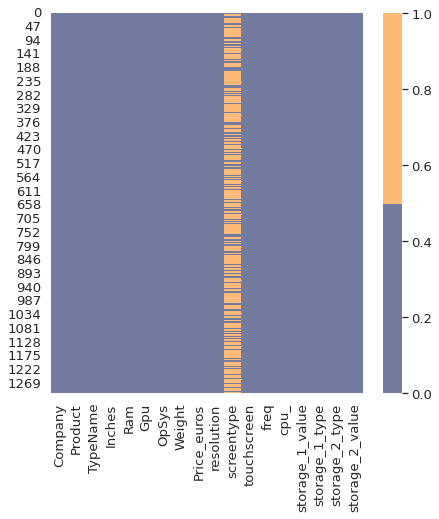

In [ ]:
cols =df.columns
colours = ['#747BA1', '#FFBA77'] # specify the orange  - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
#configer our imputer to fill our data 
# imputer       = SimpleImputer(missing_values= np.nan, strategy='most_frequent')

In [ ]:

# df['storage_2_type']        = imputer.fit_transform(df[['storage_2_type']])
# df['screentype']      = imputer.fit_transform(df[['screentype']])

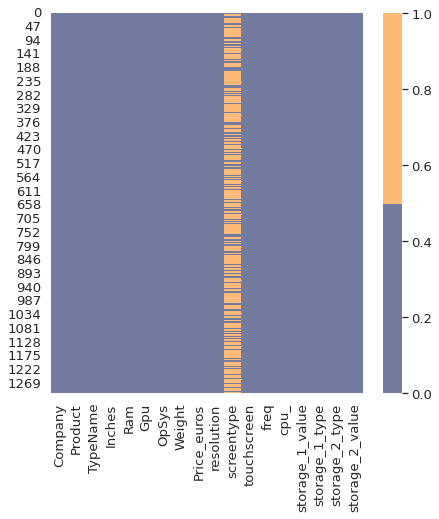

In [ ]:
cols =df.columns
colours = ['#747BA1', '#FFBA77'] # specify the orange  - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

# Dealing with Numerical Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          1303 non-null   object 
 1   Product          1303 non-null   object 
 2   TypeName         1303 non-null   object 
 3   Inches           1303 non-null   float64
 4   Ram              1303 non-null   int64  
 5   Gpu              1303 non-null   object 
 6   OpSys            1303 non-null   object 
 7   Weight           1303 non-null   float64
 8   Price_euros      1303 non-null   float64
 9   resolution       1303 non-null   object 
 10  screentype       365 non-null    object 
 11  touchscreen      1303 non-null   float64
 12  freq             1303 non-null   float64
 13  cpu_             1303 non-null   object 
 14  storage_1_value  1303 non-null   float64
 15  storage_1_type   1303 non-null   object 
 16  storage_2_type   1303 non-null   object 
 17  storage_2_valu

<font size="4" >**Price** </font> 

In [ ]:
df.describe()[['Price_euros']].T

,count,mean,std,min,25%,50%,75%,max
Price_euros,1303.0,1123.686992,699.009043,174.0,599.0,977.0,1487.88,6099.0


In [ ]:
df.corr()[['Price_euros']].T

,Inches,Ram,Weight,Price_euros,touchscreen,freq,storage_1_value,storage_2_value
Price_euros,0.068197,0.743007,0.21037,1.0,0.191226,0.430293,-0.122365,0.295004


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


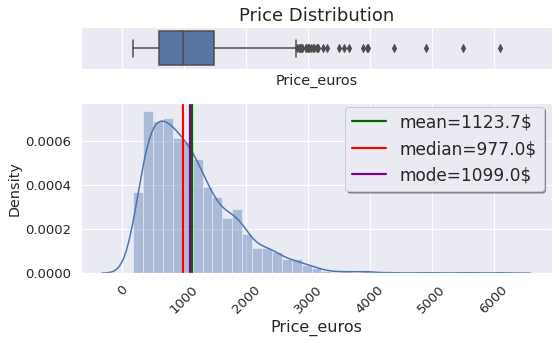

In [ ]:
numerical_plotting(df,'Price_euros','Price Distribution','$')

In [ ]:
# get all numeric column
numeric_column = sorted(df.select_dtypes(include=np.number).columns.tolist())
numeric_column

['Inches',
 'Price_euros',
 'Ram',
 'Weight',
 'freq',
 'storage_1_value',
 'storage_2_value',
 'touchscreen']

<font size="4" >**Inches** </font> 

In [ ]:
df.describe()[['Inches']].T

,count,mean,std,min,25%,50%,75%,max
Inches,1303.0,15.017191,1.426304,10.1,14.0,15.6,15.6,18.4


In [ ]:
df.corr()[['Price_euros']].loc[['Inches']]

,Price_euros
Inches,0.068197


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


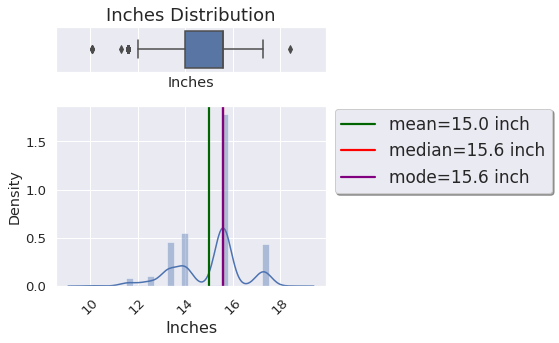

In [ ]:
numerical_plotting(df,'Inches','Inches Distribution',' inch')

 **Notes to be considered** 📔☝
1.   lap top average inches is 15.
2.   there are corollation between price and inches


<font size="4" >**Ram** </font> 

In [ ]:
df.describe()[['Ram']].T

,count,mean,std,min,25%,50%,75%,max
Ram,1303.0,8.382195,5.084665,2.0,4.0,8.0,8.0,64.0


In [ ]:
df.corr()[['Price_euros']].loc[['Ram']]

,Price_euros
Ram,0.743007


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


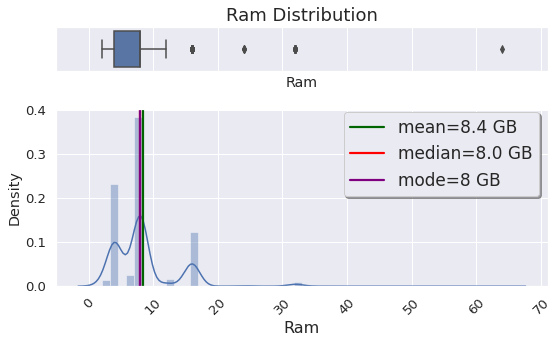

In [ ]:
numerical_plotting(df,'Ram','Ram Distribution',' GB')

 **Notes to be considered** 📔☝
1.   lap top average Ram is 8GB.
2.   there are hight  corollation **Positive relationship**
 between price and Ram  as ram in crease lapto price increase.
3.   max ram used in laptop is 64 G and Min 2GB


<font size="4" >**Weight** </font> 

In [ ]:
df.describe()[['Weight']].T

,count,mean,std,min,25%,50%,75%,max
Weight,1303.0,2.038734,0.665475,0.69,1.5,2.04,2.3,4.7


In [ ]:
df.corr()[['Price_euros']].loc[['Weight']]

,Price_euros
Weight,0.21037


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


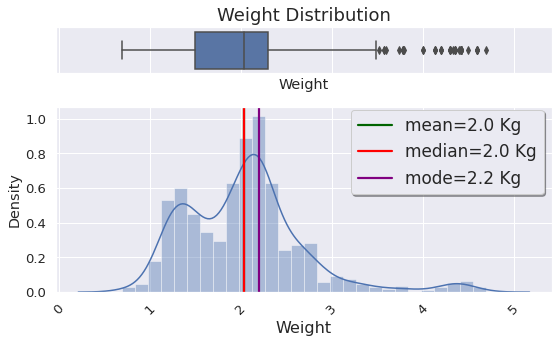

In [ ]:
numerical_plotting(df,'Weight','Weight Distribution',' Kg')

 **Notes to be considered** 📔☝
1.   lap top average weight is 2Kg.
2.   there are small corrollation between weight and price with 0.21 with  positive corrolation.
3.   max weight used in laptop is 4.7 Kg and Min 0.69Kg


<font size="4" >**Frequancy** </font> 

In [ ]:
df.describe()[['freq']].T

,count,mean,std,min,25%,50%,75%,max
freq,1303.0,2.298772,0.50634,0.9,2.0,2.5,2.7,3.6


In [ ]:
df.corr()[['Price_euros']].loc[['freq']]

,Price_euros
freq,0.430293


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


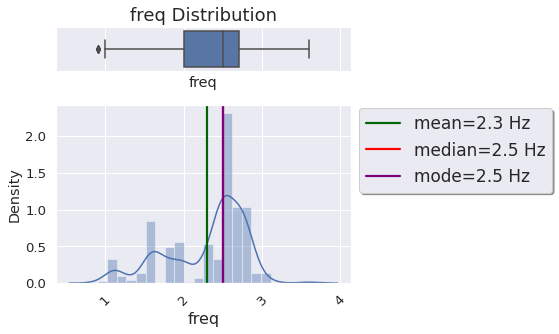

In [ ]:
numerical_plotting(df,'freq','freq Distribution',' Hz')

 **Notes to be considered** 📔☝
1.   lap top average Freqancy is 2.3Hz.
2.   there are hight  corrollation between Freq and price with 0.43 with  positive corrolation.
3.   max ram used in laptop is 3.6 Hz and Min 0.9Hz


<font size="4" >**touchscreen** </font> 

In [ ]:
df.describe()[['touchscreen']].T

,count,mean,std,min,25%,50%,75%,max
touchscreen,1303.0,0.147352,0.354593,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.corr()[['Price_euros']].loc[['touchscreen']]

,Price_euros
touchscreen,0.191226


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


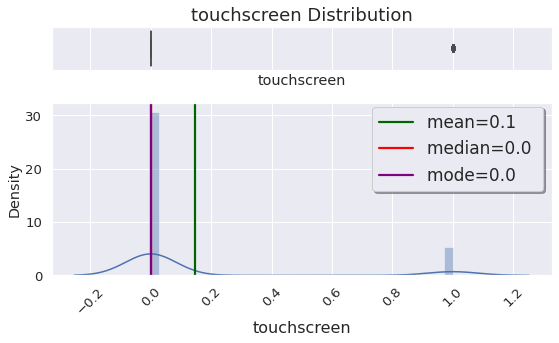

In [ ]:
numerical_plotting(df,'touchscreen','touchscreen Distribution',' ')

# Dealing with Categorical Data

<font size="4" >**Company** </font> 
**we will answer below question** 🌜
1. what is height price of laptop ?
2. what is numberof laptop per comapny?
3. what is the 5  height avg of laptop price of each company?
4. what is the 5 top company that selling laptop ?

**we will answer below question** 🌜
1. what is height price of laptop ?
2. what is numberof laptop per comapny?
3. what is the 5  height avg of laptop price of each company?
4. what is the 5 top company that selling laptop ?



In [ ]:
#what is numberof laptop per comapny?
df['Company'].value_counts()

dell         297
lenovo       297
hp           274
asus         158
acer         103
msi           54
toshiba       48
apple         21
samsung        9
razer          7
mediacom       7
microsoft      6
xiaomi         4
vero           4
chuwi          3
google         3
fujitsu        3
lg             3
huawei         2
Name: Company, dtype: int64

In [ ]:
#what is the height laptop price 
df.groupby('Company').max()[['Price_euros']].sort_values(by ='Price_euros',ascending=False).head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  


,Price_euros
Company,
razer,6099.0
lenovo,4899.0
hp,4389.0
asus,3975.0
dell,3659.4


In [ ]:
#what is the 5 height avg of laptop price of each company?
df.groupby('Company').mean()[['Price_euros']].sort_values(by ='Price_euros',ascending=False).head(5)

,Price_euros
Company,
razer,3346.142857
lg,2099.000000
msi,1728.908148
google,1677.666667
microsoft,1612.308333


In [ ]:
#what is the 5 top company that selling laptop ?
df.groupby('Company').sum()[['Price_euros']].sort_values(by ='Price_euros',ascending=False).head(5)

,Price_euros
Company,
dell,352262.49
lenovo,322656.18
hp,292570.31
asus,174458.76
msi,93361.04


In [ ]:
 !pip install matplotlib==3.5.2

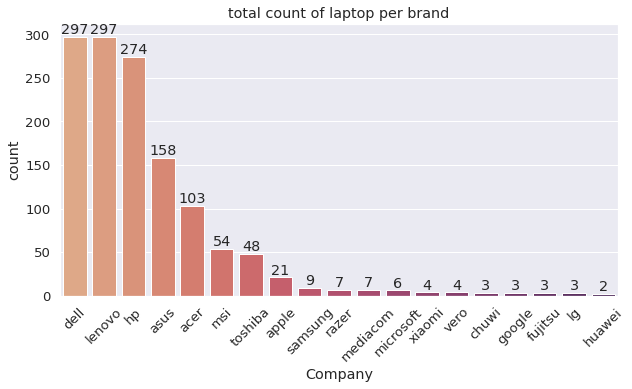

In [ ]:
categorical_plotting(df,'Company','total count of laptop per brand')

 **Notes to be considered** 📔☝
1.   lap top with barnd razer  is the height price .
2.   most of laptop is dell , lenovo,hp


<font size="4" >**Product** </font> 

**we will answer below question** 🌜
1. what is count  of product per company  ?
2. what is the  product mosrt seeling ?
3. what is the 5  height avg of laptop price of each company?
4. what is the 5 top company that selling laptop ?

In [ ]:
df['Product'].value_counts()

xps 13                                     30
inspiron 3567                              29
probook 450                                22
250 g6                                     21
legion y520-15ikbn                         19
                                           ..
17-x047na (i3-6006u/8gb/1tb/w10)            1
v310-15isk (i5-6200u/4gb/1tb/fhd/no         1
vivobook x540ya-xx519t                      1
envy 13-ab020nr                             1
v330-15ikb (i5-8250u/4gb/500gb/fhd/w10)     1
Name: Product, Length: 576, dtype: int64

In [ ]:
#what is count  of product per company  ?
df.groupby(['Product','Company']).count()[['Price_euros']].sort_values(by ='Price_euros',ascending=False).head(5)

,,Price_euros
Product,Company,
xps 13,dell,30
inspiron 3567,dell,29
probook 450,hp,22
250 g6,hp,21
legion y520-15ikbn,lenovo,19


In [ ]:
#what is the 5 product most seeling ?
df.groupby(['Product']).max()[['Price_euros']].sort_values(by ='Price_euros',ascending=False).head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  


,Price_euros
Product,
blade pro,6099.0
thinkpad p51,4899.0
zbook 17,4389.0
rog g701vo,3975.0
rog g703vi-e5062t,3890.0


 **Notes to be considered** 📔☝
1.   lap top with name **blade pro**  is the height price with 6099$ .


<font size="4" >**TypeName** </font> 

**we will answer below question** 🌜
1. what is max price for laptop   typename  ?
2. what is count  of typename per company  ?
3. what is total sales laptop per type name for each product ?


In [ ]:
df['TypeName'].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

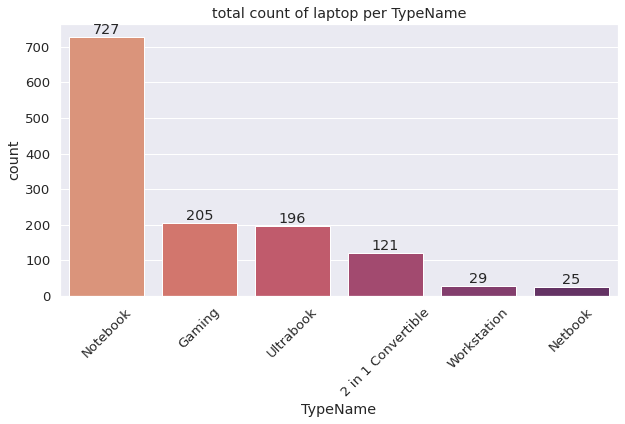

In [ ]:
categorical_plotting(df,'TypeName','total count of laptop per TypeName')

In [ ]:
#what is max price for laptop per  typename  ?
df.groupby(['TypeName']).max()[['Price_euros']].sort_values(by ='Price_euros',ascending=False).head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  


,Price_euros
TypeName,
Gaming,6099.0
Notebook,4899.0
Workstation,4389.0
Ultrabook,3100.0
2 in 1 Convertible,2824.0


In [ ]:
#what is total sales laptop per type name ?
df.groupby(['TypeName']).sum()[['Price_euros']].sort_values(by ='Price_euros',ascending=False).head(10)

,Price_euros
TypeName,
Notebook,568571.16
Gaming,354933.03
Ultrabook,303453.15
2 in 1 Convertible,155170.60
Workstation,66130.41
Netbook,15905.80


In [ ]:
#what is total sales laptop per type name for each product ?
df.groupby(['TypeName','Product']).sum()[['Price_euros']].sort_values(by ='Price_euros',ascending=False).head(10)

Price_euros
TypeName    Product                        
Gaming      alienware 17           41670.58
Ultrabook   xps 13                 40573.90
Gaming      blade pro              20595.00
Ultrabook   macbook pro            20055.13
Gaming      legion y520-15ikbn     19837.00
Notebook    xps 15                 19010.10
            probook 450            18630.46
Gaming      rog strix              18263.90
Ultrabook   thinkpad x1            17565.64
Workstation zbook 17               17071.28

 **Notes to be considered** 📔☝
1. **Gaming** laptop is highest price
2. **Notebook**  is the most selling type wiklth total sales 568571.16 💲


<font size="4" >**Operating system** </font> 




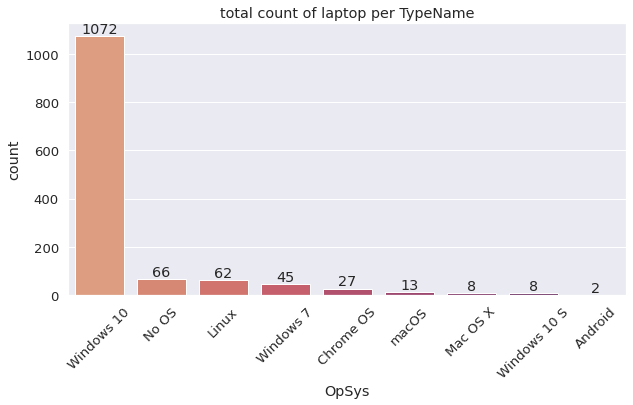

In [ ]:
categorical_plotting(df,'OpSys','total count of laptop per TypeName')

<font size="4" >**Operating system** </font> 




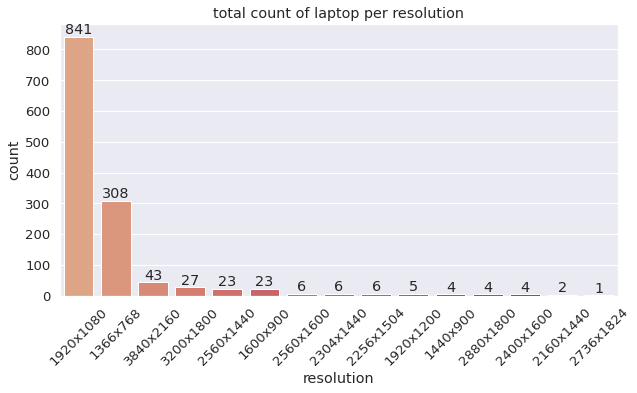

In [ ]:
categorical_plotting(df,'resolution','total count of laptop per resolution')

 **Notes to be considered** 📔☝
1. most of laptop resolution is 1920x1080
2. most of laptops use windows as operating system


# Conclusion ⚛

In [ ]:
df.corr()

,Inches,Ram,Weight,Price_euros,touchscreen,freq,storage_1_value,storage_2_value
Inches,1.000000,0.237993,0.827631,0.068197,-0.361735,0.307870,0.269511,0.386670
Ram,0.237993,1.000000,0.383874,0.743007,0.116984,0.368000,0.018271,0.391826
Weight,0.827631,0.383874,1.000000,0.210370,-0.294620,0.320434,0.179962,0.479133
Price_euros,0.068197,0.743007,0.210370,1.000000,0.191226,0.430293,-0.122365,0.295004
touchscreen,-0.361735,0.116984,-0.294620,0.191226,1.000000,-0.082579,-0.030950,-0.133416
freq,0.307870,0.368000,0.320434,0.430293,-0.082579,1.000000,0.066295,0.224018
storage_1_value,0.269511,0.018271,0.179962,-0.122365,-0.030950,0.066295,1.000000,-0.245546
storage_2_value,0.386670,0.391826,0.479133,0.295004,-0.133416,0.224018,-0.245546,1.000000


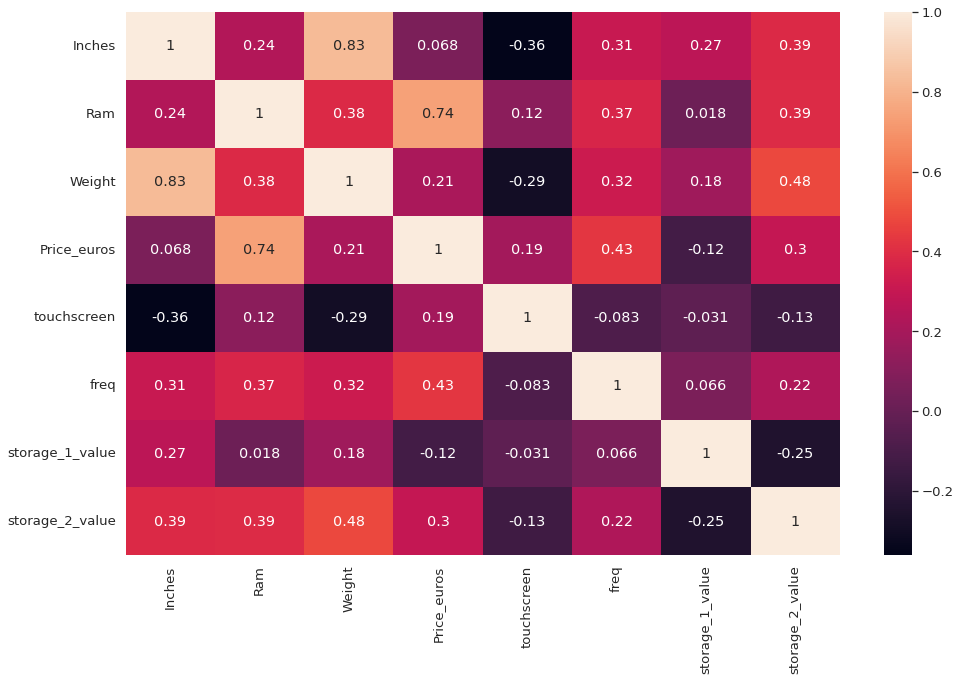

In [ ]:
plt.figure(figsize = (16,10))
sns_plot=sns.heatmap(df.corr(),annot= True)
plt.show()

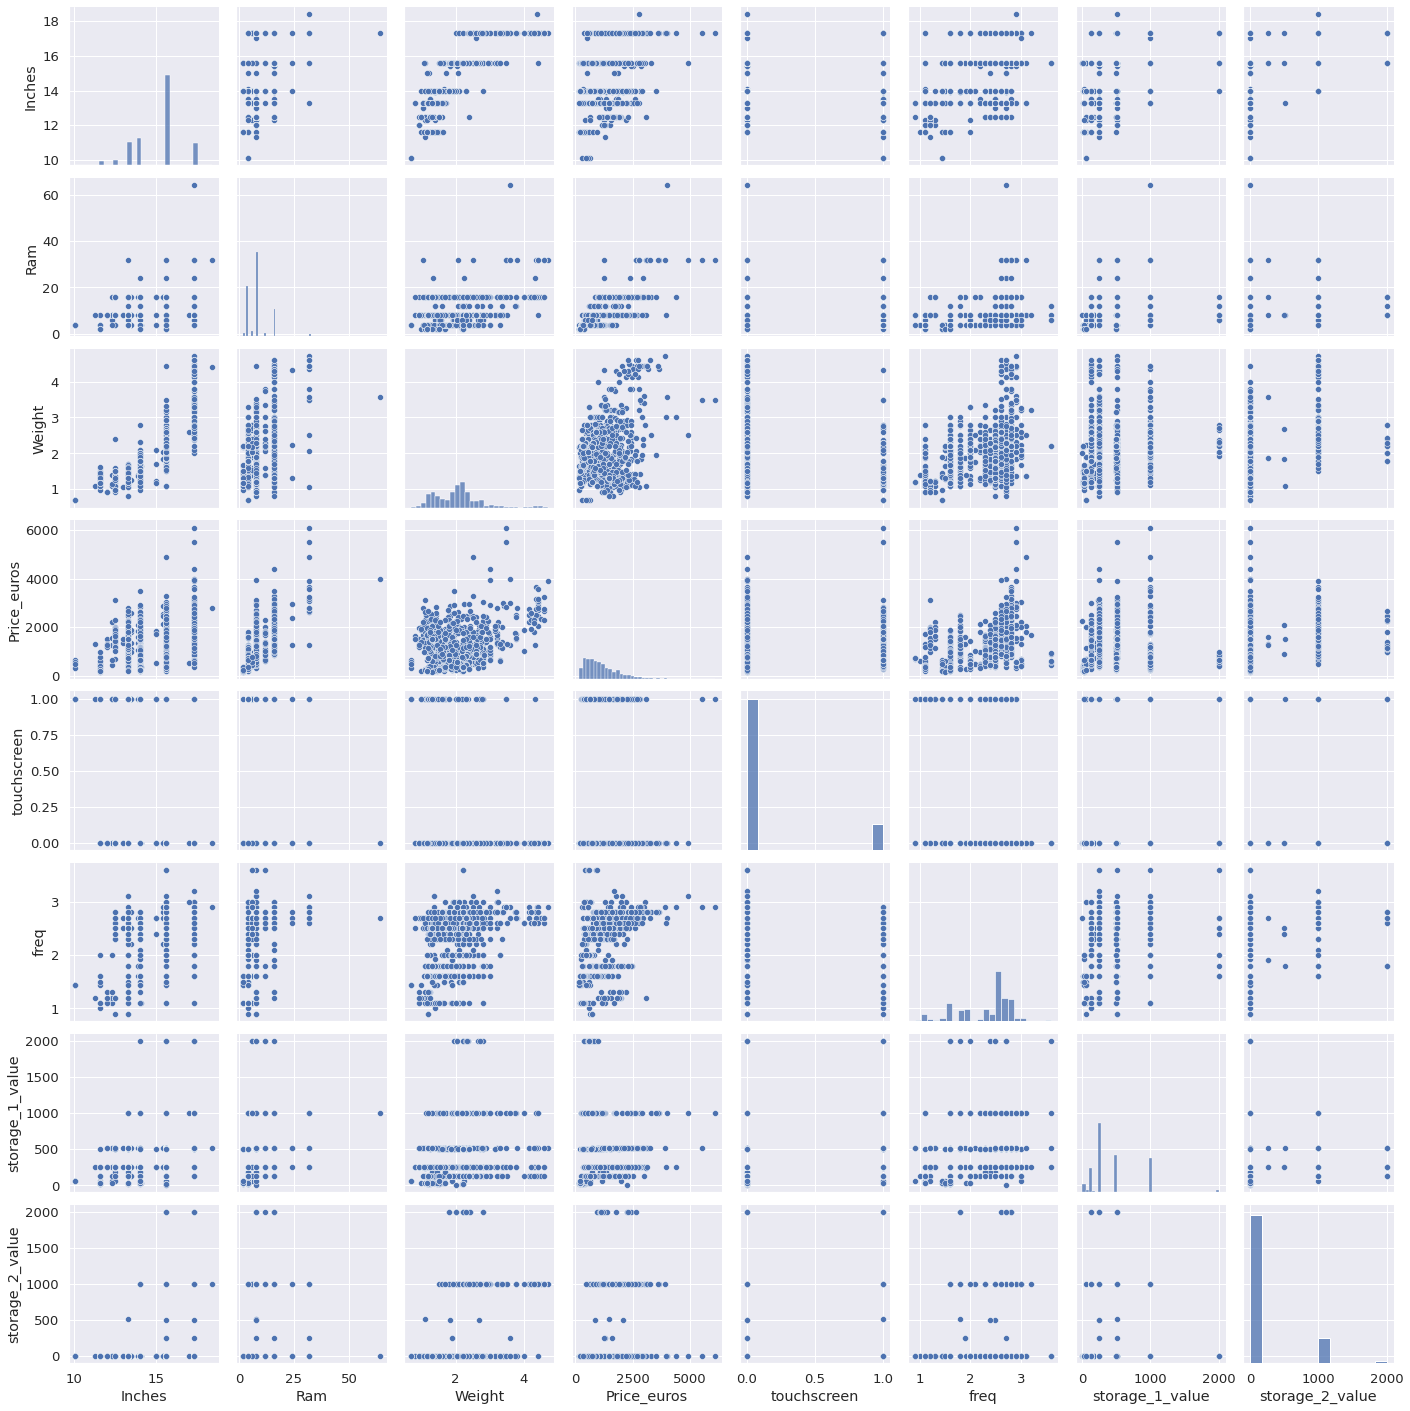

In [ ]:
sns.pairplot(data=df)

#Detecting outliers

In [57]:
idx = detect_outliers(df,0,['Inches','Ram','Weight','Price_euros','touchscreen','freq','storage_1_value','storage_2_value'])
print ('Total Ouliers is : ',len(idx))

Total Ouliers is :  713


In [58]:
outliers_df = df.loc[idx]
clean_df = df.drop(idx,axis=0)

In [59]:
clean_df.shape

(590, 18)

In [60]:
df

,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,resolution,screentype,touchscreen,freq,cpu_,storage_1_value,storage_1_type,storage_2_type,storage_2_value
0,apple,macbook pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,ipspanelretinadisplay,0.0,2.3,intel core i5,128.0,SSD,NaN,0.0
1,apple,macbook air,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,NaN,0.0,1.8,intel core i5,128.0,FlashStorage,NaN,0.0
2,hp,250 g6,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,NaN,0.0,2.5,intel core i5 7200u,256.0,SSD,NaN,0.0
3,apple,macbook pro,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,ipspanelretinadisplay,0.0,2.7,intel core i7,512.0,SSD,NaN,0.0
4,apple,macbook pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,ipspanelretinadisplay,0.0,3.1,intel core i5,256.0,SSD,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,lenovo,yoga 500-14isk,2 in 1 Convertible,14.0,4,Intel HD Graphics 520,Windows 10,1.80,638.00,1920x1080,ipspanel,1.0,2.5,intel core i7 6500u,128.0,SSD,NaN,0.0
1299,lenovo,yoga 900-13isk,2 in 1 Convertible,13.3,16,Intel HD Graphics 520,Windows 10,1.30,1499.00,3200x1800,ipspanel,1.0,2.5,intel core i7 6500u,512.0,SSD,NaN,0.0
1300,lenovo,ideapad 100s-14ibr,Notebook,14.0,2,Intel HD Graphics,Windows 10,1.50,229.00,1366x768,NaN,0.0,1.6,intel celeron dual core n3050,64.0,FlashStorage,NaN,0.0
1301,hp,15-ac110nv (i7-6500u/6gb/1tb/radeon,Notebook,15.6,6,AMD Radeon R5 M330,Windows 10,2.19,764.00,1366x768,NaN,0.0,2.5,intel core i7 6500u,1000.0,HDD,NaN,0.0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          1303 non-null   object 
 1   Product          1303 non-null   object 
 2   TypeName         1303 non-null   object 
 3   Inches           1303 non-null   float64
 4   Ram              1303 non-null   int64  
 5   Gpu              1303 non-null   object 
 6   OpSys            1303 non-null   object 
 7   Weight           1303 non-null   float64
 8   Price_euros      1303 non-null   float64
 9   resolution       1303 non-null   object 
 10  screentype       365 non-null    object 
 11  touchscreen      1303 non-null   float64
 12  freq             1303 non-null   float64
 13  cpu_             1303 non-null   object 
 14  storage_1_value  1303 non-null   float64
 15  storage_1_type   1303 non-null   object 
 16  storage_2_type   1303 non-null   object 
 17  storage_2_valu

In [62]:
df=df.fillna('NaN')
df

,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,resolution,screentype,touchscreen,freq,cpu_,storage_1_value,storage_1_type,storage_2_type,storage_2_value
0,apple,macbook pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,ipspanelretinadisplay,0.0,2.3,intel core i5,128.0,SSD,NaN,0.0
1,apple,macbook air,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,NaN,0.0,1.8,intel core i5,128.0,FlashStorage,NaN,0.0
2,hp,250 g6,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,NaN,0.0,2.5,intel core i5 7200u,256.0,SSD,NaN,0.0
3,apple,macbook pro,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,ipspanelretinadisplay,0.0,2.7,intel core i7,512.0,SSD,NaN,0.0
4,apple,macbook pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,ipspanelretinadisplay,0.0,3.1,intel core i5,256.0,SSD,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,lenovo,yoga 500-14isk,2 in 1 Convertible,14.0,4,Intel HD Graphics 520,Windows 10,1.80,638.00,1920x1080,ipspanel,1.0,2.5,intel core i7 6500u,128.0,SSD,NaN,0.0
1299,lenovo,yoga 900-13isk,2 in 1 Convertible,13.3,16,Intel HD Graphics 520,Windows 10,1.30,1499.00,3200x1800,ipspanel,1.0,2.5,intel core i7 6500u,512.0,SSD,NaN,0.0
1300,lenovo,ideapad 100s-14ibr,Notebook,14.0,2,Intel HD Graphics,Windows 10,1.50,229.00,1366x768,NaN,0.0,1.6,intel celeron dual core n3050,64.0,FlashStorage,NaN,0.0
1301,hp,15-ac110nv (i7-6500u/6gb/1tb/radeon,Notebook,15.6,6,AMD Radeon R5 M330,Windows 10,2.19,764.00,1366x768,NaN,0.0,2.5,intel core i7 6500u,1000.0,HDD,NaN,0.0


In [63]:
df = df.replace({'NaN': 0})
df

,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,resolution,screentype,touchscreen,freq,cpu_,storage_1_value,storage_1_type,storage_2_type,storage_2_value
0,apple,macbook pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,ipspanelretinadisplay,0.0,2.3,intel core i5,128.0,SSD,0,0.0
1,apple,macbook air,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,0,0.0,1.8,intel core i5,128.0,FlashStorage,0,0.0
2,hp,250 g6,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,0,0.0,2.5,intel core i5 7200u,256.0,SSD,0,0.0
3,apple,macbook pro,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,ipspanelretinadisplay,0.0,2.7,intel core i7,512.0,SSD,0,0.0
4,apple,macbook pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,ipspanelretinadisplay,0.0,3.1,intel core i5,256.0,SSD,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,lenovo,yoga 500-14isk,2 in 1 Convertible,14.0,4,Intel HD Graphics 520,Windows 10,1.80,638.00,1920x1080,ipspanel,1.0,2.5,intel core i7 6500u,128.0,SSD,0,0.0
1299,lenovo,yoga 900-13isk,2 in 1 Convertible,13.3,16,Intel HD Graphics 520,Windows 10,1.30,1499.00,3200x1800,ipspanel,1.0,2.5,intel core i7 6500u,512.0,SSD,0,0.0
1300,lenovo,ideapad 100s-14ibr,Notebook,14.0,2,Intel HD Graphics,Windows 10,1.50,229.00,1366x768,0,0.0,1.6,intel celeron dual core n3050,64.0,FlashStorage,0,0.0
1301,hp,15-ac110nv (i7-6500u/6gb/1tb/radeon,Notebook,15.6,6,AMD Radeon R5 M330,Windows 10,2.19,764.00,1366x768,0,0.0,2.5,intel core i7 6500u,1000.0,HDD,0,0.0


# Data preprocessing

In [64]:
#convert all categorical columns to one hot encodding
cat_columns = sorted([col for col in df.columns if df[col].dtype=="O"])
cat_columns

['Company',
 'Gpu',
 'OpSys',
 'Product',
 'TypeName',
 'cpu_',
 'resolution',
 'screentype',
 'storage_1_type',
 'storage_2_type']

In [65]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'Gpu', 'OpSys',
       'Weight', 'Price_euros', 'resolution', 'screentype', 'touchscreen',
       'freq', 'cpu_', 'storage_1_value', 'storage_1_type', 'storage_2_type',
       'storage_2_value'],
      dtype='object')

In [66]:
# apply on hot encoding
# for i in cat_columns :
#    df = pd.get_dummies(df, columns=cat_columns, drop_first=True)


In [67]:
df.columns.tolist()

['Company',
 'Product',
 'TypeName',
 'Inches',
 'Ram',
 'Gpu',
 'OpSys',
 'Weight',
 'Price_euros',
 'resolution',
 'screentype',
 'touchscreen',
 'freq',
 'cpu_',
 'storage_1_value',
 'storage_1_type',
 'storage_2_type',
 'storage_2_value']

In [ ]:
print('Dataframe encoded by OHE dimension : ', pd.get_dummies(df, columns=cat_columns, drop_first=True).shape)


Dataframe encoded by OHE dimension :  (1303, 835)


In [68]:
#start label encoding
label_encoder= LabelEncoder()
for col in cat_columns :
    df[col] = label_encoder.fit_transform(df[col].astype(str))


In [69]:
df.head()

,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,resolution,screentype,touchscreen,freq,cpu_,storage_1_value,storage_1_type,storage_2_type,storage_2_value
0,1,289,4,13.3,8,58,8,1.37,1339.69,10,2,0.0,2.3,40,128.0,3,0,0.0
1,1,288,4,13.3,8,51,8,1.34,898.94,1,0,0.0,1.8,40,128.0,0,0,0.0
2,7,50,3,15.6,8,53,4,1.86,575.00,3,0,0.0,2.5,46,256.0,3,0,0.0
3,1,289,4,15.4,16,9,8,1.83,2537.45,12,2,0.0,2.7,54,512.0,3,0,0.0
4,1,289,4,13.3,8,59,8,1.37,1803.60,10,2,0.0,3.1,40,256.0,3,0,0.0


# Data Preperation & spliting

In [70]:
#divide data to input and output
x = df.drop(['Price_euros'],axis=1)
y = df['Price_euros']

In [71]:
#data scaling
sc  = StandardScaler()
x_scaled = sc.fit_transform(x)

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=.3 ,random_state=42,shuffle=True)

# Models

<font size="4" >**linear regression** </font> 

In [ ]:
#linear regression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
lr.coef_

array([  37.51417547,   29.47977349,   73.92137504, -112.91006344,
        338.92144081,   59.8269783 ,   73.30966738,  111.9085368 ,
        120.00238525,   18.99932035,   67.76218351,  116.875165  ,
         87.76745195,  -54.57864643,   31.86867436,   19.09559208,
        -31.8549931 ])

In [ ]:
r2_score(y_test,y_pred)

0.7142593906127928

In [ ]:
print("R2 using Linear Regression : {:.2f} %".format(np.round(r2_score(y_test, y_pred),4)*100))

R2 using Linear Regression : 71.43 %


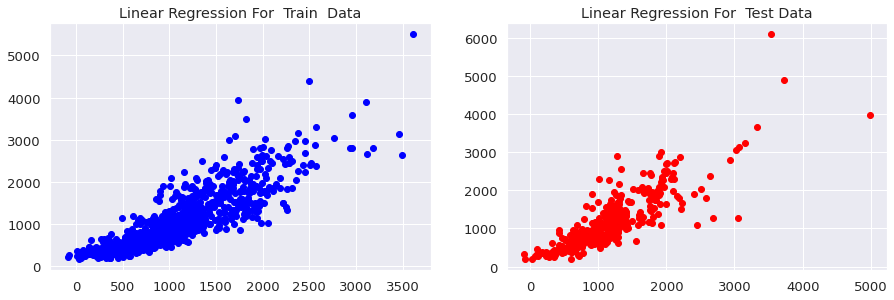

In [ ]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.title('Linear Regression For  Train  Data')
plt.scatter(lr.predict(x_train), y_train, color='blue')
plt.subplot(2,2,2)
plt.title('Linear Regression For  Test Data')
plt.scatter(y_pred, y_test, color='red')


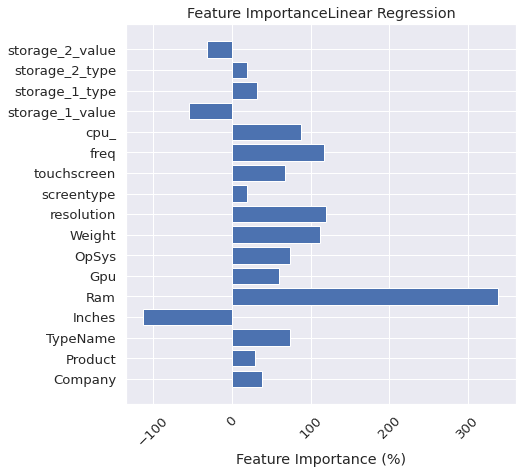

In [ ]:
plot_feature_importance(x,lr,'Linear Regression')

In [ ]:
lr_df = pd.DataFrame({"predicted_price":y_pred,"actual_price":y_test})
lr_df.head(5)

,predicted_price,actual_price
479,1275.687930,1672.0
1022,1215.622879,1149.0
298,512.865835,499.0
1265,1284.514759,899.0
774,797.609162,1244.0


<font size="4" >**Lasso Regression** </font>  



In [ ]:
#strat lasso with optuna

In [79]:
def lasso_optuna (trial,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test):

    #define parameters
    params = {
    'alpha'             : trial.suggest_loguniform('alpha', 1e-15, 5.0), 
    'max_iter'          : trial.suggest_categorical('max_iter', [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]), 
    'tol'               : trial.suggest_loguniform('tol', 1e-9, 1e-1),

    }
    #creat model anf pass parameters 
    model = Lasso(**params) 
    model.fit(x_train, y_train) 
    predection = model.predict(x_test)
    rmse = mean_squared_error(y_test, predection, squared=False)
    return rmse


In [80]:
study = optuna.create_study(direction="minimize")
#start serach 
study.optimize(lasso_optuna, n_trials=200)

[I 2022-05-28 08:50:01,315] A new study created in memory with name: no-name-fc310ad0-c108-4fa6-a0c0-983d0cb4655a
[I 2022-05-28 08:50:01,335] Trial 0 finished with value: 391.1628117805627 and parameters: {'alpha': 5.943242102881518e-09, 'max_iter': 4000, 'tol': 1.4346241076281302e-09}. Best is trial 0 with value: 391.1628117805627.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.336e+07, tolerance: 3.025e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
[I 2022-05-28 08:50:01,442] Trial 1 finished with value: 391.1628117848586 and parameters: {'alpha': 2.437681514730191e-15, 'max_iter': 4000, 'tol': 0.0007096669638031884}. Best is trial 0 with value: 391.1628117805627.
[I 2022-05-28 08:50:01,449] Trial 2 finished with value: 391.16931926380

In [81]:
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")

params = []

for key, value in trial.params.items():
    params.append(value)
    print("    {}: {}".format(key, value))

Number of finished trials:  200
Best trial:
  Value: 390.2493478646144
  Params: 
    alpha: 1.7272756099031756
    max_iter: 6000
    tol: 5.658786498274836e-07


In [82]:
lasso_best  = Lasso(alpha=1.7272756099031756,max_iter=6000,tol=5.658786498274836e-07)
lasso_best.fit(x_train,y_train)
y_pred = lasso_best.predict(x_test)
print("R2 using  Lasso Regression : {:.2f} %".format(np.round(r2_score(y_test, y_pred),4)*100))

R2 using  Lasso Regression : 71.56 %


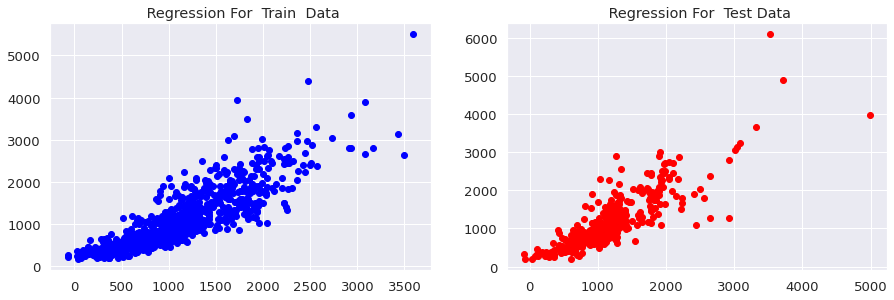

In [85]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.title(' Regression For  Train  Data')
plt.scatter(lasso_best.predict(x_train), y_train, color='blue')
plt.subplot(2,2,2)
plt.title(' Regression For  Test Data')
plt.scatter(y_pred, y_test, color='red')



In [87]:
lasso_best.coef_

array([  35.10582015,   28.16060772,   67.88927895, -101.79871143,
        339.43451845,   61.48248201,   72.71616707,   96.16465716,
        120.3095556 ,   18.63622441,   63.18840481,  115.05543766,
         86.46451845,  -52.24596998,   32.74949514,    0.        ,
        -12.78214659])

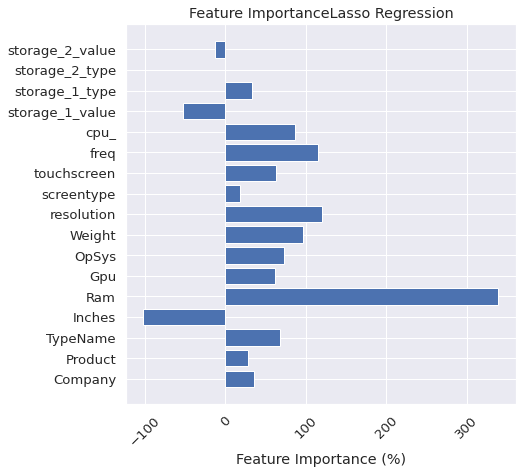

In [86]:

plot_feature_importance(x,lasso_best,'Lasso Regression')

In [88]:
lasso_df = pd.DataFrame({"predicted_price":y_pred,"actual_price":y_test})
lasso_df.head(5)


,predicted_price,actual_price
479,1277.655498,1672.0
1022,1220.947776,1149.0
298,511.206452,499.0
1265,1277.358096,899.0
774,791.410445,1244.0


In [ ]:
#end lasso with optuna

<font size="4" >**SVR** </font> 

In [90]:
def svr_optuna (trial,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test):
    #define parameters
    params = {
    'kernel'          : trial.suggest_categorical('kernel', ['linear','poly','rbf','sigmoid']),    
    'gamma'           : trial.suggest_loguniform('gamma', 1e-3, 5.0),
    'epsilon'         : trial.suggest_loguniform('epsilon', 1e-3, 5.0),
    'C'               :  trial.suggest_loguniform('C',1e-5,1e5),
    'degree'          : trial.suggest_categorical('degree', [1,3,5]),
    'max_iter'        : trial.suggest_categorical('max_iter', [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]), 
    }
    #creat model anf pass parameters 
    model =SVR(**params) 
    model.fit(x_train, y_train) 
    predection = model.predict(x_test)
    rmse = mean_squared_error(y_test, predection, squared=False)
    return rmse


In [91]:
study = optuna.create_study(direction="minimize")
#start serach 
study.optimize(svr_optuna, n_trials=200)

[I 2022-05-28 09:28:18,376] A new study created in memory with name: no-name-8eb3752a-6dde-4920-86ac-3f4bff8c82e5
[I 2022-05-28 09:28:18,465] Trial 0 finished with value: 753.4310515240417 and parameters: {'kernel': 'rbf', 'gamma': 0.0032501694801550375, 'epsilon': 0.001039547089881804, 'C': 0.0017540823725259976, 'degree': 5, 'max_iter': 5000}. Best is trial 0 with value: 753.4310515240417.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
[I 2022-05-28 09:28:18,572] Trial 1 finished with value: 2638.278312217228 and parameters: {'kernel': 'poly', 'gamma': 4.054041349290338, 'epsilon': 0.014098548985049844, 'C': 38.23274706039985, 'degree': 3, 'max_iter': 4000}. Best is trial 0 with value: 753.4310515240417.
[I 2022-05-28 09:28:18,679] Trial 2 finished with value: 607.0652975589747 and parameters: {'kernel': 'sigmoid'

In [92]:

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")

params = []

for key, value in trial.params.items():
    params.append(value)
    print("    {}: {}".format(key, value))

Number of finished trials:  200
Best trial:
  Value: 272.76845841194887
  Params: 
    kernel: rbf
    gamma: 0.017080457929743036
    epsilon: 4.444526852221563
    C: 23053.46803771787
    degree: 3
    max_iter: 8000


In [103]:
svr_best = SVR(kernel='rbf',C=23053.46803771787, degree=3, epsilon=4.444526852221563, gamma=0.017080457929743036, max_iter=8000)
svr_best.fit(x_train,y_train)
y_pred =svr_best.predict(x_test)
print("R2 using  SVR Regression : {:.2f} %".format(np.round(r2_score(y_test, y_pred),4)*100))

R2 using  SVR Regression : 86.11 %


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=8000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


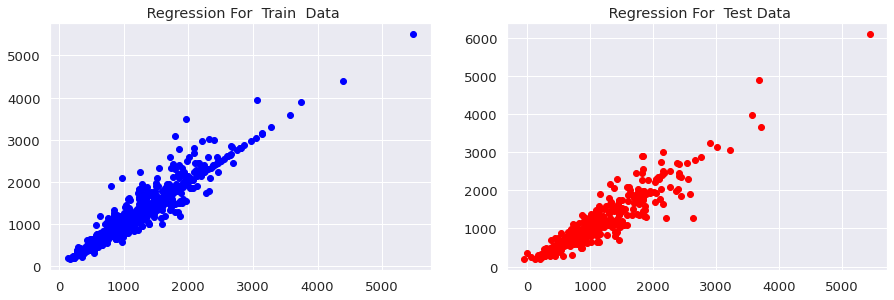

In [95]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.title(' Regression For  Train  Data')
plt.scatter(svr_best.predict(x_train), y_train, color='blue')
plt.subplot(2,2,2)
plt.title(' Regression For  Test Data')
plt.scatter(y_pred, y_test, color='red')


In [99]:
svr_df = pd.DataFrame({"predicted_price":y_pred,"actual_price":y_test})
svr_df.head(5)

,predicted_price,actual_price
479,1330.286968,1672.0
1022,1247.864329,1149.0
298,362.297302,499.0
1265,887.103370,899.0
774,1418.315225,1244.0


<font size="4" >**KNN Regressor** </font> 

In [121]:
def knnregressors_optuna (trial,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test):
    #define parameters
    params = {
    'n_neighbors'     : trial.suggest_categorical('n_neighbors', [1,3,5,7,9,11,13,15]), 
    'weights'         : trial.suggest_categorical('weights', ['uniform','distance']),
    'algorithm'       : trial.suggest_categorical('algorithm',['auto','ball_tree','kd_tree','brute']),
    'leaf_size'       : trial.suggest_int('leaf_size', 30, 150),
    'p'               : trial.suggest_int('p', 2, 50),
    
    }
    #creat model anf pass parameters 
    model = KNeighborsRegressor(**params) 
    model.fit(x_train, y_train) 
    predection = model.predict(x_test)
    rmse = mean_squared_error(y_test, predection, squared=False)
    return rmse


In [122]:
study = optuna.create_study(direction="minimize")
#start serach 
study.optimize(knnregressors_optuna, n_trials=200)

[I 2022-05-28 10:27:38,695] A new study created in memory with name: no-name-82656f72-f05f-472e-8c6f-68c1a190e7fb
[I 2022-05-28 10:27:39,052] Trial 0 finished with value: 442.6015220107476 and parameters: {'n_neighbors': 9, 'weights': 'uniform', 'algorithm': 'brute', 'leaf_size': 74, 'p': 23}. Best is trial 0 with value: 442.6015220107476.
[I 2022-05-28 10:27:39,397] Trial 1 finished with value: 374.98590732063496 and parameters: {'n_neighbors': 3, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 112, 'p': 13}. Best is trial 1 with value: 374.98590732063496.
[I 2022-05-28 10:27:39,752] Trial 2 finished with value: 390.8385435126021 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 71, 'p': 14}. Best is trial 1 with value: 374.98590732063496.
[I 2022-05-28 10:27:40,097] Trial 3 finished with value: 448.8819979418387 and parameters: {'n_neighbors': 15, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 146, 'p': 40}. Best 

In [123]:

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")

params = []

for key, value in trial.params.items():
    params.append(value)
    print("    {}: {}".format(key, value))

Number of finished trials:  200
Best trial:
  Value: 357.3660983780636
  Params: 
    n_neighbors: 3
    weights: distance
    algorithm: ball_tree
    leaf_size: 38
    p: 5


In [146]:
knn_best = KNeighborsRegressor(n_neighbors=3,weights='distance',algorithm='kd_tree',leaf_size=145,p=5)
# knn_best = KNeighborsRegressor(algorithm='kd_tree', n_neighbors=3, p=1, weights='distance')
# knn_best = KNeighborsRegressor(n_neighbors=3,algorithm='ball_tree', p=5, weights='distance',leaf_size=38)
knn_best.fit(x_train,y_train)
y_pred = knn_best.predict(x_test)
print("R2 using Knn Regressors: {:.2f} %".format(np.round(r2_score(y_test, y_pred),4)*100))

R2 using Knn Regressors: 76.15 %


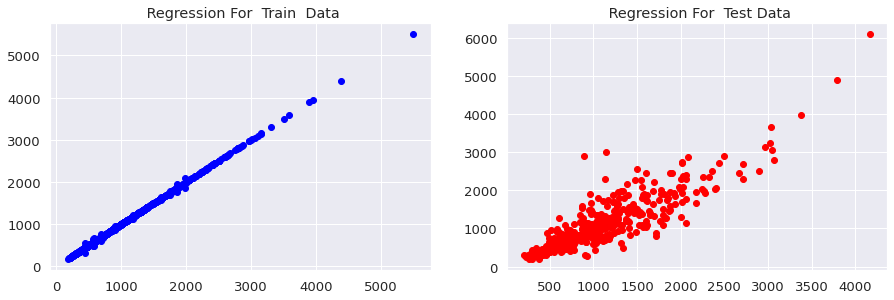

In [119]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.title(' Regression For  Train  Data')
plt.scatter(knn_best.predict(x_train), y_train, color='blue')
plt.subplot(2,2,2)
plt.title(' Regression For  Test Data')
plt.scatter(y_pred, y_test, color='red')


In [144]:
knn_df = pd.DataFrame({"predicted_price":y_pred,"actual_price":y_test})
knn_df.head(5)

,predicted_price,actual_price
479,1112.941504,1672.0
1022,969.054941,1149.0
298,449.776938,499.0
1265,899.000000,899.0
774,1645.210936,1244.0


<font size="4" >**RandomForest** </font> 

In [ ]:
def randomforest_optuna (trial,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test):
    params = {

    'criterion'        : trial.suggest_categorical('criterion', ['squared_error', 'absolute_error', 'poisson']),
    'bootstrap'        : trial.suggest_categorical('bootstrap',['True','False']),
    'max_depth'        : trial.suggest_int('max_depth', 1, 10000),
    'max_features'     : trial.suggest_categorical('max_features', ['auto', 'sqrt','log2']),
    'max_leaf_nodes'   : trial.suggest_int('max_leaf_nodes', 1, 10000),
    'n_estimators'     : trial.suggest_int('n_estimators', 30, 1000),


    }
    #creat model anf pass parameters 
    model = RandomForestRegressor(**params) 
    model.fit(x_train, y_train) 
    predection = model.predict(x_test)
    rmse = mean_squared_error(y_test, predection, squared=False)
    return rmse


In [ ]:
study = optuna.create_study(direction="minimize")
#start serach 
study.optimize(randomforest_optuna, n_trials=200)

[I 2022-05-27 12:06:15,201] A new study created in memory with name: no-name-5890f8fd-3a59-4c95-b7e4-64e3989fb01c
[I 2022-05-27 12:06:36,036] Trial 0 finished with value: 287.36157909678553 and parameters: {'criterion': 'absolute_error', 'bootstrap': 'False', 'max_depth': 7899, 'max_features': 'auto', 'max_leaf_nodes': 6372, 'n_estimators': 587}. Best is trial 0 with value: 287.36157909678553.
[I 2022-05-27 12:06:36,673] Trial 1 finished with value: 269.21492818267956 and parameters: {'criterion': 'squared_error', 'bootstrap': 'True', 'max_depth': 808, 'max_features': 'log2', 'max_leaf_nodes': 9777, 'n_estimators': 256}. Best is trial 1 with value: 269.21492818267956.
[I 2022-05-27 12:07:09,336] Trial 2 finished with value: 287.18706529684107 and parameters: {'criterion': 'absolute_error', 'bootstrap': 'True', 'max_depth': 5981, 'max_features': 'auto', 'max_leaf_nodes': 7332, 'n_estimators': 924}. Best is trial 1 with value: 269.21492818267956.
[I 2022-05-27 12:07:19,097] Trial 3 finis

In [ ]:

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")

params = []

for key, value in trial.params.items():
    params.append(value)
    print("    {}: {}".format(key, value))

Number of finished trials:  100
Best trial:
  Value: 262.0127748426844
  Params: 
    criterion: squared_error
    bootstrap: True
    max_depth: 6234
    max_features: sqrt
    max_leaf_nodes: 2962
    n_estimators: 742


In [ ]:
rf = RandomForestRegressor(bootstrap= False,max_depth=7407,criterion='squared_error',max_features='log2',max_leaf_nodes= 4365,n_estimators= 59)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print("R2 using Random Forest: {:.2f} %".format(np.round(r2_score(y_test, y_pred_rf),4)*100))

R2 using Random Forest: 87.81 %


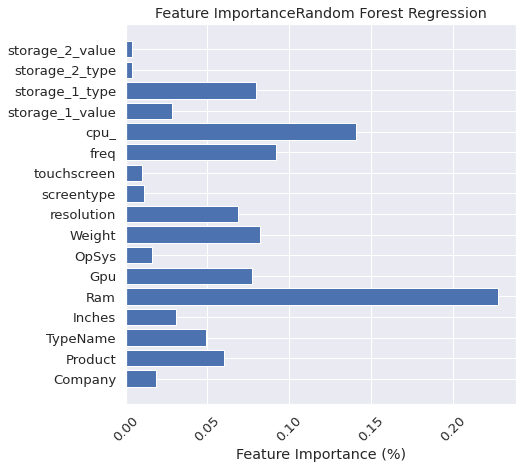

In [ ]:
plot_feature_importance_2(x,rf,'Random Forest Regression')

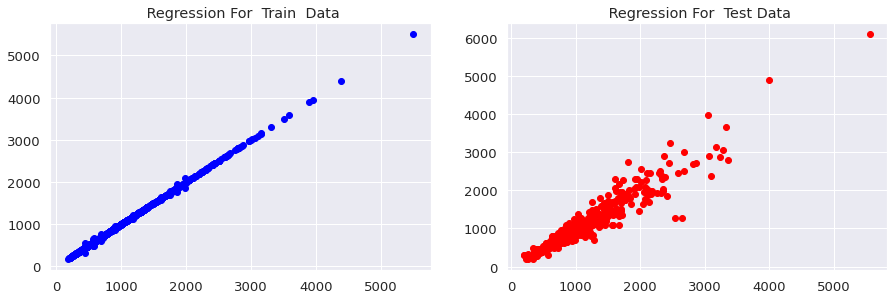

In [ ]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.title(' Regression For  Train  Data')
plt.scatter(rf.predict(x_train), y_train, color='blue')
plt.subplot(2,2,2)
plt.title(' Regression For  Test Data')
plt.scatter(y_pred, y_test, color='red')

In [ ]:
rf_df = pd.DataFrame({"predicted_price":y_pred,"actual_price":y_test})
rf_df.head(5)

,predicted_price,actual_price
479,1440.577881,1672.0
1022,1226.200806,1149.0
298,493.786072,499.0
1265,780.399536,899.0
774,1404.105103,1244.0


<font size="4" >**XGboost** </font> 

In [150]:
import xgboost as xgb

In [ ]:
def xgboost_optuna (trial,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test):
    #define matrix for xfb
    dtrain = xgb.DMatrix(x_train, label=y_train)
    dvalid = xgb.DMatrix(x_test, label=y_test)
    #define parameters
    params = {
    'objective'        : 'reg:squarederror',
    'min_child_weight' : trial.suggest_int('min_child_weight', 1, 100),
    'lambda'           : trial.suggest_loguniform('lambda', 1e-3, 5.0),
    'alpha'            : trial.suggest_loguniform('alpha', 1e-3, 5.0),
    'max_depth'        : trial.suggest_categorical('max_depth', [3,4,5,6,7]),
    'subsample'        : trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
    'learning_rate'    : trial.suggest_categorical('learning_rate', [0.001,0.01,0.05,0.1,0.2,0.25,0.3]),
    'n_estimators'     : trial.suggest_categorical('n_estimators', [300,400,500,1000,1500,2000,2500,3000]), 
    'colsample_bytree' : trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]),
    
    }
    #creat model anf pass parameters 
    model = xgb.XGBRegressor(**params) 
    model.fit(x_train, y_train, eval_set=[(x_test, y_test)], early_stopping_rounds=100, verbose=False) 
    predection = model.predict(x_test)
    rmse = mean_squared_error(y_test, predection, squared=False)
    return rmse


In [ ]:
study = optuna.create_study(direction="minimize")
#start serach 
study.optimize(xgboost_optuna, n_trials=100)

[I 2022-05-27 09:17:43,131] A new study created in memory with name: no-name-e0176f93-37ff-4d89-972a-3476e2070d1a
[I 2022-05-27 09:17:46,704] Trial 0 finished with value: 342.30668992082093 and parameters: {'min_child_weight': 64, 'lambda': 0.06430278073775712, 'alpha': 0.9426164319694745, 'max_depth': 6, 'subsample': 0.5, 'learning_rate': 0.01, 'n_estimators': 2000, 'colsample_bytree': 1.0}. Best is trial 0 with value: 342.30668992082093.
[I 2022-05-27 09:17:51,081] Trial 1 finished with value: 268.0224907049267 and parameters: {'min_child_weight': 34, 'lambda': 0.0014201627678492004, 'alpha': 0.0011228539679292871, 'max_depth': 6, 'subsample': 0.8, 'learning_rate': 0.01, 'n_estimators': 3000, 'colsample_bytree': 0.3}. Best is trial 1 with value: 268.0224907049267.
[I 2022-05-27 09:17:51,485] Trial 2 finished with value: 439.175668121158 and parameters: {'min_child_weight': 69, 'lambda': 0.0036287975355534597, 'alpha': 2.334009226223421, 'max_depth': 6, 'subsample': 0.5, 'learning_rat

In [ ]:
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")

params = []

for key, value in trial.params.items():
    params.append(value)
    print("    {}: {}".format(key, value))

Number of finished trials:  100
Best trial:
  Value: 213.08317304538414
  Params: 
    min_child_weight: 1
    lambda: 0.4976963961689301
    alpha: 1.740382456453752
    max_depth: 4
    subsample: 0.5
    learning_rate: 0.1
    n_estimators: 3000
    colsample_bytree: 0.3


In [ ]:
params

[1, 0.4976963961689301, 1.740382456453752, 4, 0.5, 0.1, 3000, 0.3]

In [ ]:
xgb_best = xgb.XGBRegressor(reg_lambda = 0.5601308335136773,
                   alpha = 0.122069825326168,
                   colsample_bytree = 0.3,
                   subsample = 1,
                   learning_rate = 0.2,
                   n_estimators = 400,
                   max_depth = 3,
                   min_child_weight = 2)

In [ ]:
xgb_best.fit(x_train, y_train, eval_set=[(x_test, y_test)], early_stopping_rounds=50, verbose=0)

[09:20:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=0.122069825326168, colsample_bytree=0.3, learning_rate=0.2,
             min_child_weight=2, n_estimators=400,
             reg_lambda=0.5601308335136773)

In [ ]:
y_pred =xgb_best.predict(x_test) 

In [ ]:
print("R2 with XGBoost: {:.2f} % ".format(np.round(r2_score(y_test, y_pred),4)*100))

R2 with XGBoost: 90.32 % 


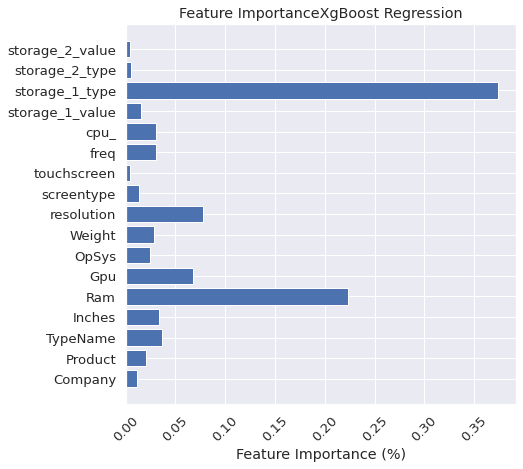

In [ ]:
plot_feature_importance_2(x,xgb_best,'XgBoost Regression')

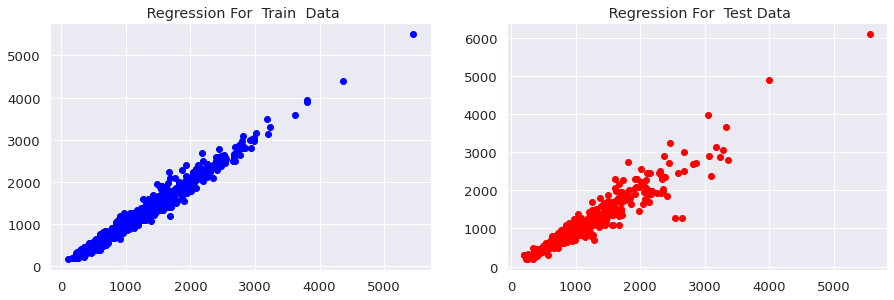

In [ ]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.title(' Regression For  Train  Data')
plt.scatter(xgb_best.predict(x_train), y_train, color='blue')
plt.subplot(2,2,2)
plt.title(' Regression For  Test Data')
plt.scatter(y_pred, y_test, color='red')

In [ ]:
xbg_df = pd.DataFrame({"predicted_price":y_pred,"actual_price":y_test})
xbg_df.head(5)

,predicted_price,actual_price
479,1440.577881,1672.0
1022,1226.200806,1149.0
298,493.786072,499.0
1265,780.399536,899.0
774,1404.105103,1244.0


<font size="4" >**Adaboost** </font> 

In [182]:
def adaboost_optuna (trial,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test):
    #define matrix for xfb
    dtrain = xgb.DMatrix(x_train, label=y_train)
    dvalid = xgb.DMatrix(x_test, label=y_test)
    #define parameters
    params = {
    'learning_rate'           : trial.suggest_loguniform('learning_rate', 1e-3, 5.0),
    'n_estimators'            : trial.suggest_categorical('n_estimators', [100,200,300,400,500,600,700,800,900,1000,1500,2000,2500,3000]),
    }
    #creat model anf pass parameters 
    model = AdaBoostRegressor(**params) 
    model.fit(x_train, y_train) 
    predection = model.predict(x_test)
    rmse = mean_squared_error(y_test, predection, squared=False)
    return rmse


In [183]:
study = optuna.create_study(direction="minimize")
#start serach 
study.optimize(adaboost_optuna, n_trials=200)

[I 2022-05-28 12:05:11,581] A new study created in memory with name: no-name-00c1962f-4ff2-4c9d-81d6-4114455f6176
[I 2022-05-28 12:05:12,891] Trial 0 finished with value: 429.4706910616634 and parameters: {'learning_rate': 0.472174479292768, 'n_estimators': 557}. Best is trial 0 with value: 429.4706910616634.
[I 2022-05-28 12:05:14,346] Trial 1 finished with value: 401.41372398717795 and parameters: {'learning_rate': 0.07612514835571442, 'n_estimators': 579}. Best is trial 1 with value: 401.41372398717795.
[I 2022-05-28 12:05:15,651] Trial 2 finished with value: 420.25436548710417 and parameters: {'learning_rate': 1.3911352503172036, 'n_estimators': 575}. Best is trial 1 with value: 401.41372398717795.
[I 2022-05-28 12:05:16,041] Trial 3 finished with value: 415.8425198170526 and parameters: {'learning_rate': 0.0010463190264354454, 'n_estimators': 146}. Best is trial 1 with value: 401.41372398717795.
[I 2022-05-28 12:05:18,369] Trial 4 finished with value: 399.5039956940573 and paramet

In [180]:
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")

params = []

for key, value in trial.params.items():
    params.append(value)
    print("    {}: {}".format(key, value))

Number of finished trials:  200
Best trial:
  Value: 351.9991656892477
  Params: 
    learning_rate: 0.1073243332338965
    n_estimators: 100


In [185]:
# ada_best = AdaBoostRegressor(learning_rate=0.1073243332338965,n_estimators=100)
ada_best = AdaBoostRegressor(learning_rate=0.1073243332338965,n_estimators=100)

ada_best.fit(x_train,y_train)
y_pred = ada_best.predict(x_test)
print("R2 using Ada boost Regressor: {:.2f} %".format(np.round(r2_score(y_test, y_pred),4)*100))


R2 using Ada boost Regressor: 76.41 %


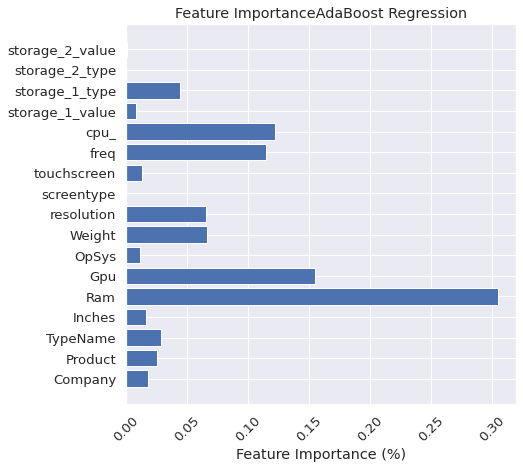

In [187]:
plot_feature_importance_2(x,ada_best,'AdaBoost Regression')

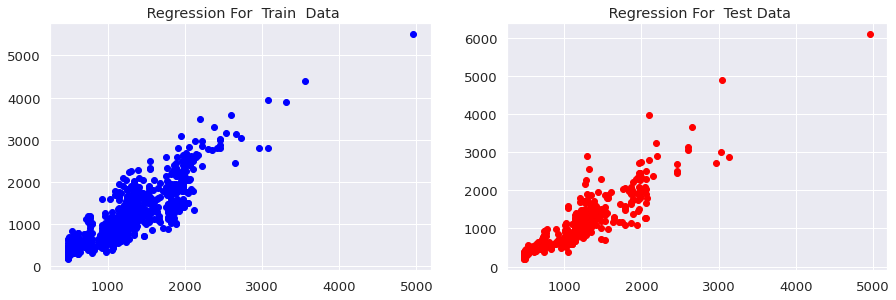

In [188]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.title(' Regression For  Train  Data')
plt.scatter(ada_best.predict(x_train), y_train, color='blue')
plt.subplot(2,2,2)
plt.title(' Regression For  Test Data')
plt.scatter(y_pred, y_test, color='red')

In [189]:
ada_df = pd.DataFrame({"predicted_price":y_pred,"actual_price":y_test})
ada_df.head(5)

,predicted_price,actual_price
479,1278.391438,1672.0
1022,1278.391438,1149.0
298,565.406000,499.0
1265,1197.337522,899.0
774,1233.398661,1244.0


**Thanks for  <span style="color:red;">Reviewing</span> My kernel also, if you have any comments or suggestion please raise it**